# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

## Material and methods

**To do: ADseq and DeClone, sequencing data, species tree**

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *

# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [8]:
# Computing the distribution of DeClone scores for scaffolding adjacencies in step bins
def DeClone_scores_distribution(nb_bins):
    ivalues=range(0,nb_bins+1)
    adjacencies_scores_distribution={}   # Indexed per species name and then by bins rank
    for species_name in GENOMES_list():  # Instantiating the structure adjacencies_scores_distribution
        adjacencies_scores_distribution[species_name]={}
        for t in ivalues:
            adjacencies_scores_distribution[species_name][t]=0 
    for instance in DECLONE_instances(): # Populating the structure adjacencies_scores_distribution
        for adjacency in DECLONE_adj_per_instance(instance):
            score = DECLONE_adj_score(adjacency)
            species_name = DECLONE_adj_species_name(adjacency)
            if score<1.0 and species_name!="ANCESTRAL": # Scaffolding adjacency
                adjacencies_scores_distribution[species_name][math.floor(score*nb_bins)]+=1
    return(adjacencies_scores_distribution)
    
# Plotting a distribution of scores per species in stacked bars
def plot_scores_distribution_per_species(T,nb_bins):
    ivalues=range(0,nb_bins+1)
    bars={}
    bars[0]=[]
    for species in GENOMES_list():
        bars[0].append(0)
    for t in ivalues:
        bars[t+1]=[]
        for species_name in GENOMES_list():
            bars[t+1].append(T[species_name][t])
 
    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ivalues)))
    ind    = np.arange(len(GENOMES_list()))
    lft    = sum([np.array(bars[0])])
    height = 0.8

    for t in ivalues:
        plt.barh(ind, np.array(bars[t+1]), height=height, color=colors[t], left=lft)
        lft+=sum([np.array(bars[t+1])])

    plt.yticks(ind+height/2,  T.keys())
    plt.xlabel("Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")")    
    plt.show()

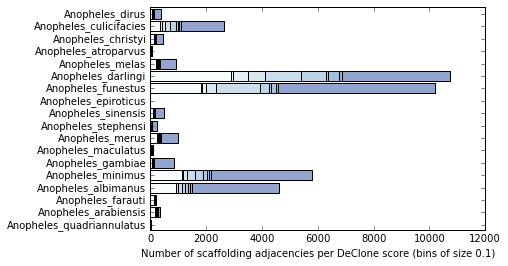

In [10]:
nb_bins=10 # Binning the adjacencies by bins of size 0.1
ADJ_SCORES_D = DeClone_scores_distribution(nb_bins)
plot_scores_distribution_per_species(ADJ_SCORES_D, nb_bins)